In [5]:
!pip install matplotlib pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 10.0 MB/s eta 0:00:0000:010:01


Session Spark prête et connectée à HDFS !


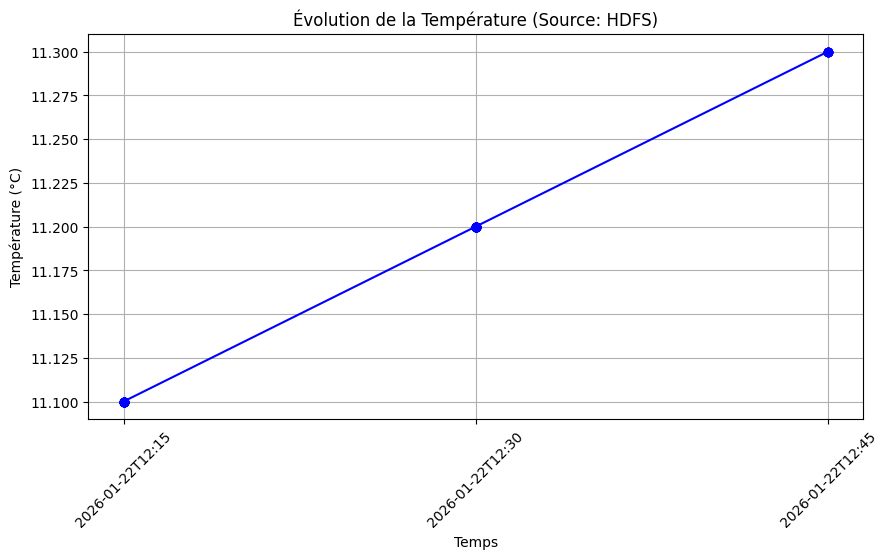

In [13]:
from pyspark.sql import SparkSession

# Création de la session avec le connecteur Kafka intégré
spark = SparkSession.builder \
    .appName("WeatherVisualizer") \
    .config("spark.jars.packages", "org.apache.spark:spark-sql-kafka-0-10_2.12:3.5.0") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://namenode:9000") \
    .getOrCreate()

print("Session Spark prête et connectée à HDFS !")

# Lecture de TOUS les fichiers JSON présents dans le dossier HDFS
df = spark.read.json("hdfs://namenode:9000/user/jovyan/weather_data/part-*.json")

# Conversion en Pandas pour le graphique
pdf = df.select("time", "temperature").orderBy("time").toPandas()

# Création du graphique
plt.figure(figsize=(10,5))
plt.plot(pdf['time'], pdf['temperature'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.title("Évolution de la Température (Source: HDFS)")
plt.xlabel("Temps")
plt.ylabel("Température (°C)")
plt.grid()
plt.show()